# 기초 통계량


In [1]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm 
import seaborn as sb
import numpy as np
from hossam import load_data

### 시각화 초기


In [2]:
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
sb.set_theme(style = my_theme)

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False


### 데이터 가져오기

In [3]:
origin = load_data('countries_aggregated')
origin.head()

[data] https://data.hossam.kr/data/lab09/countries_aggregated.xlsx
[desc] 전 세계 각국(country) 단위로 매일 집계된 COVID-19 감염 상황 (출처: Johns Hopkins University Center for Systems Science and Engineering)

field      description
---------  ----------------------------------------
Date       날짜
Country    국가명
Confirmed  해당 날짜를 기준으로 하는 누적 확진자 수
Recovered  해당 날짜를 기준으로 하는 누적 완치자 수
Deaths     해당 날짜를 기준으로 하는 누적 사망자 수



,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


### 데이터 기본 정보 파악

In [4]:
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

데이터셋 크기: (161568, 5)
열 개수: 5
행 개수: 161568


### 데이터 타입 확인

In [5]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB


### 변수 유형 분류 및 타입 변환(수치형/범주형)

In [6]:
df = origin.astype({'Country':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  category      
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(3)
memory usage: 5.2 MB


### 결측치 파악

In [8]:
df.isna().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

## 수치형 변수 통계량
### 기술 통계 확인

In [9]:
df[['Confirmed','Recovered','Deaths']].describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,161568.0,736156.934009,3.578884e+06,0.0,1220.0,23692.0,255842.00,80625120.0
Recovered,161568.0,145396.711892,9.748275e+05,0.0,0.0,126.0,17972.25,30974748.0
Deaths,161568.0,13999.436089,5.911358e+04,0.0,17.0,365.0,4509.00,988609.0


## 중심 경향성 및 산포도 해석
### 상자그림을 통한 데이터 분포 확인

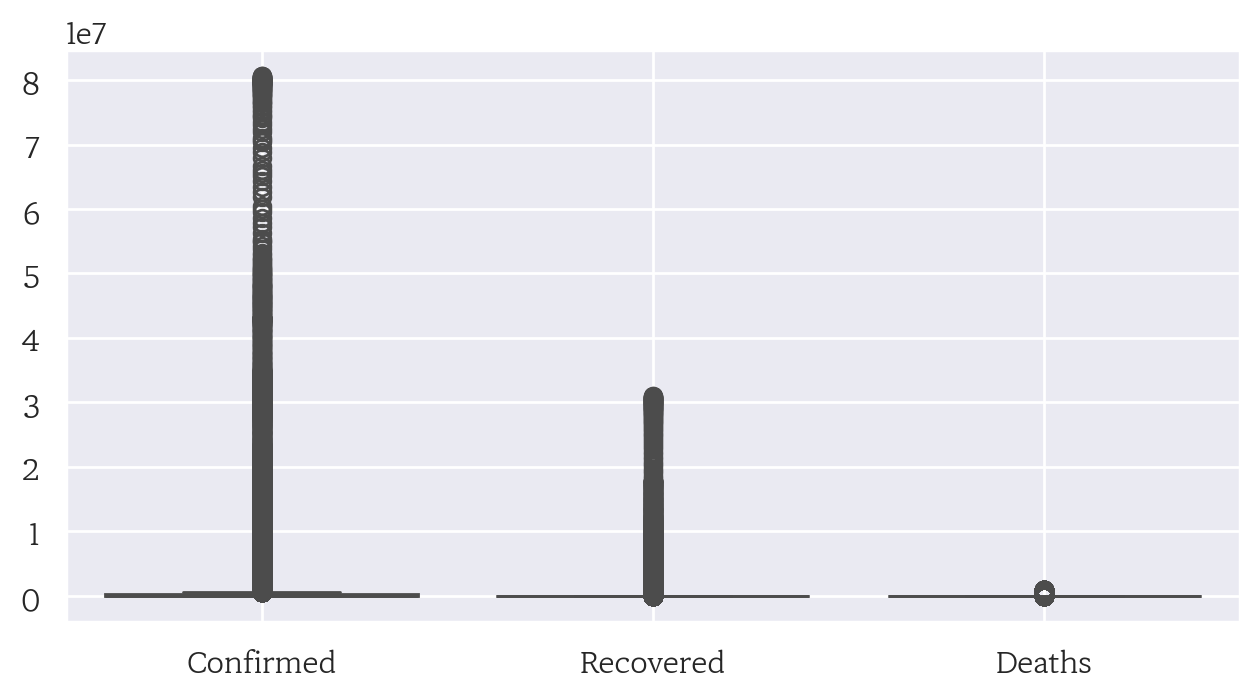

In [11]:
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.boxplot(data=df, orient = 'v')


ax.grid(True) 

# 출력
plt.tight_layout()
plt.savefig('myplot.png', dpi = my_dpi)
plt.show()
plt.close()

### 로그값을 통한 데이터 분포 재확인

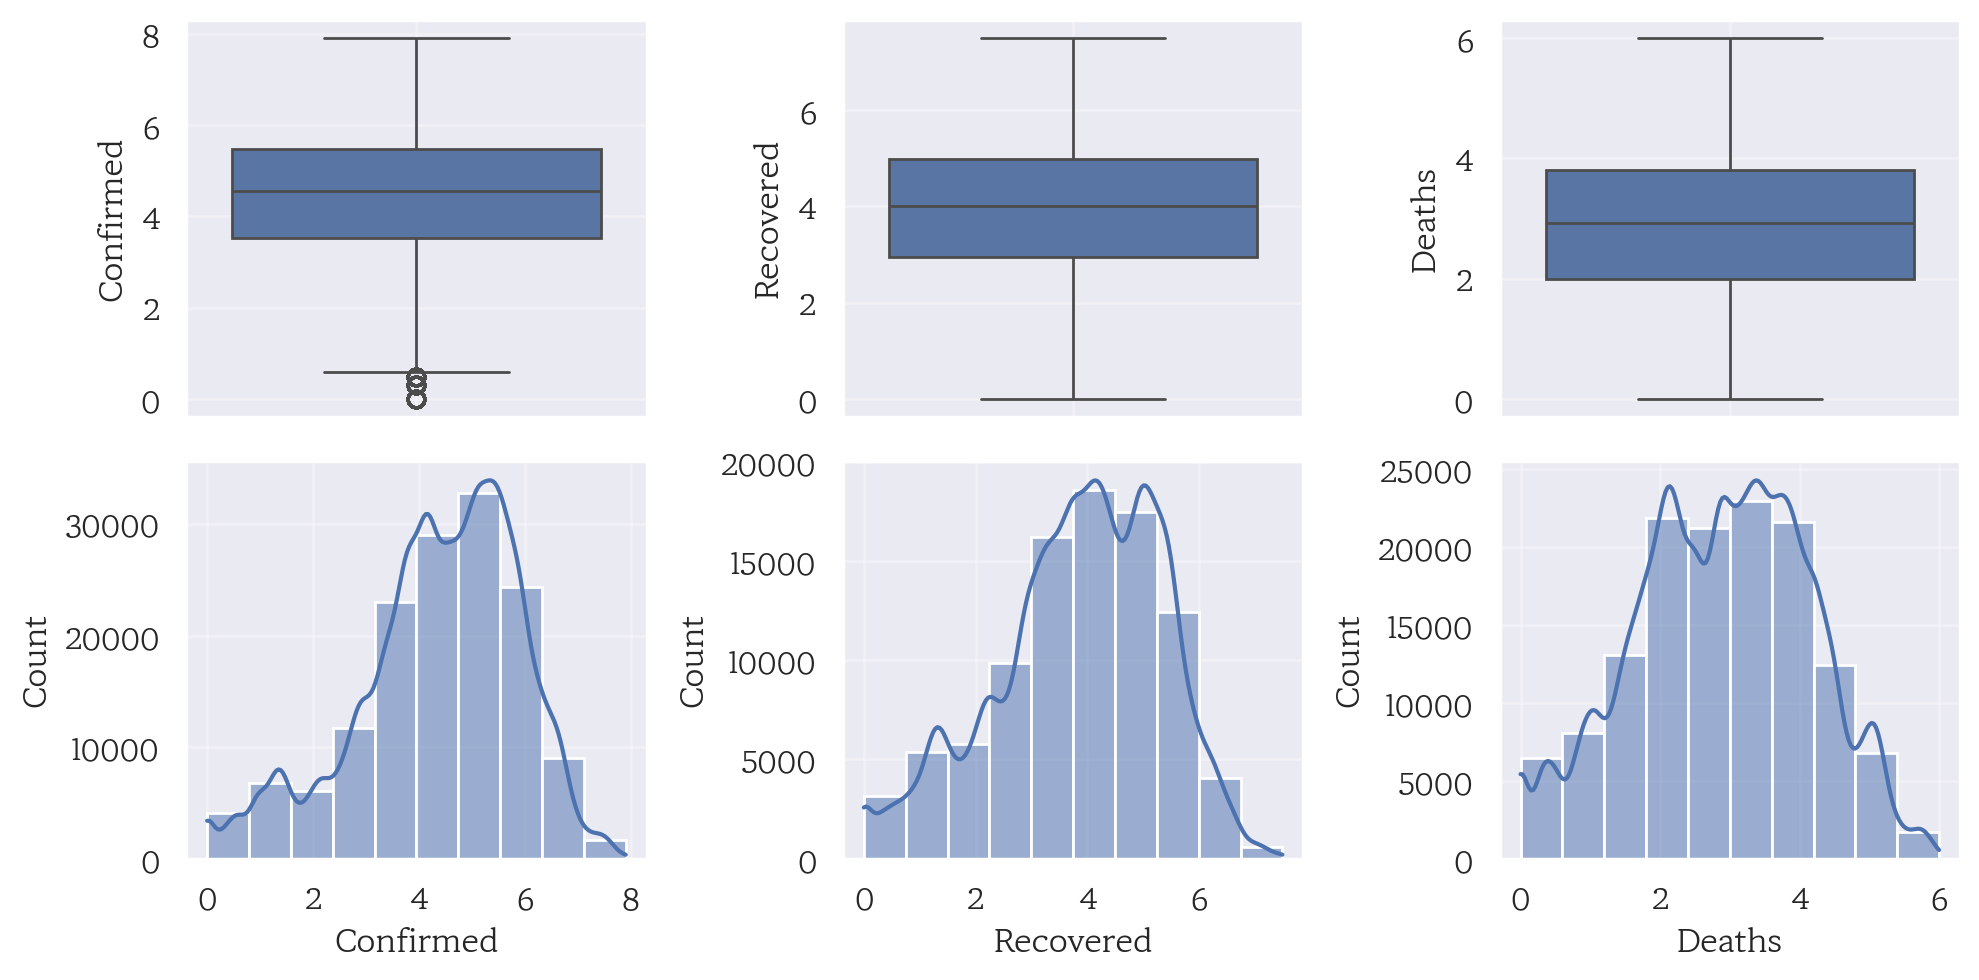

In [17]:
width_px = 2000
height_px = 1000
rows = 2
cols = 3
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

for i, col in enumerate(['Confirmed','Recovered','Deaths']):
    data = df[df[col] > 0][col]
    log_data = np.log10(data)
# box 그리기
    sb.boxplot(log_data, orient = 'v', ax=ax[0][i])
    ax[0][i].grid(True, alpha = 0.3)

    sb.histplot(log_data, bins = 10, kde = True, ax=ax[1][i])
    ax[1][i].grid(True, alpha = 0.3)
 

# 출력
plt.tight_layout()
plt.savefig('myplot.png', dpi = my_dpi)
plt.show()
plt.close()

## 범주형 변수 통계령
### 빈도 및 최빈값 확인

In [19]:
df.describe(include = 'category')

,Country
count,161568
unique,198
top,Afghanistan
freq,816
